In [47]:
%matplotlib inline
import matplotlib.pyplot as plt
import mglearn
import sklearn
import numpy as np
from sklearn.model_selection import train_test_split

w[0]: 0.393906  b: -0.031804


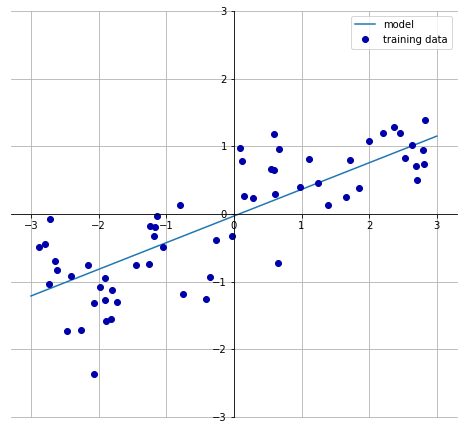

In [48]:
# illustrating the plots: w[0] and b
# on a one-D dataset might look like this
mglearn.plots.plot_linear_regression_wave()

### Linear regression (ordinary least squares)

In [49]:
from sklearn.linear_model import  LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

In [50]:
# slope (w) aka coefficients / weights - numpy array
print("lr.coef_: {}".format(lr.coef_))

# intercept (b) - float
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [ 0.39390555]
lr.intercept_: -0.031804343026759746


In [51]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

# note that test score is not very good
# but it is close to training score so
# it's probably all we will get with
# such a small dataset

Training set score: 0.67
Test set score: 0.66


In [52]:
# let's try linear regression on a more
# complex dataset: boston housing
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [53]:
# the test score is much lower - we are overfitting!
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


### Ridge Regression

In [54]:
# Ridge regression prevents any one feature outweighing all the others.
# the coefficients should be lose to zero, while still predicting well.
# we want 'regularization'.
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

# note that the test score is _higher_ than with linear regression
# we are interested in generalization so Ridge is better 
# than LinearRegression for this task

Training set score: 0.89
Test set score: 0.75


In [55]:
# the tuning button in Ridge is the _alpha_ parameter
# what happens with alpha=10

ridge10 = Ridge(10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


In [56]:
# what happens with alpha=01

ridge01 = Ridge(0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

# decreasing alpha allows the coefficients to be less restricted 
# and brings us closer to the 'sweet spot' between under/over fitting

Training set score: 0.93
Test set score: 0.77


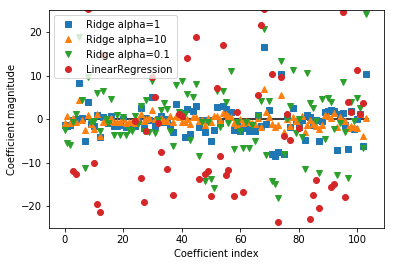

In [57]:
# let's have a look at the coefficients
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()


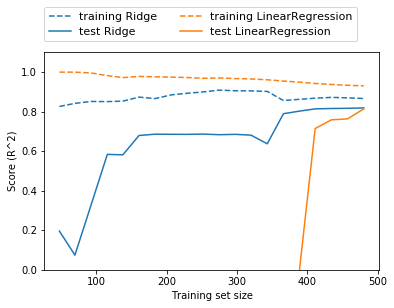

In [58]:
# if all that is too confusing, we can look at the inverse.
# keep the alpha consistent (alpha=1) 
# and change the size of the training data.
mglearn.plots.plot_ridge_n_samples()

# eventually test Ridge and test LinearRegression meet,
# with enough trainining data:
# - regularization is less important
# - Ridge and LinearRegression will have the same performation

# note also that as more data is added, LinearRegression
# training performance decreases


### Lasso Regression

In [59]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features use: {}".format(np.sum(lasso.coef_ != 0)))

# looks like we are seriously underfitting

Training set score: 0.29
Test set score: 0.21
Number of features use: 4


In [60]:
# let's turn down the alpha
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features use: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.90
Test set score: 0.77
Number of features use: 33


In [61]:
# and turn it down even more
lasso00001 = Lasso(alpha=0.001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features use: {}".format(np.sum(lasso00001.coef_ != 0)))

# and we are overfitting

Training set score: 0.94
Test set score: 0.74
Number of features use: 69


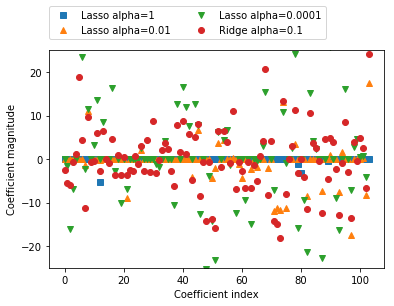

In [62]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")
plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")